# Algortimos de búsqueda de raíces

## Introducción
Consideremos el problema de caída de presión $\Delta P$ al mover un fluído con densidad $\rho$ y viscosidad cinemática $\nu$, a través de una tubería de largo $L$.

<img src="./images/presure_drop.png" width="350px" align= center>

Para un fluido que fluye a una velocidad $V$, la caída de presión está dada por:

\begin{equation*}
\frac{\Delta P}{\rho g} =f_c \frac{L}{D}\frac{V^2}{2g}
\end{equation*}

donde $f$ es el factor de fricción.

Para determinar $f_c$ debemos resolver la ecuación de Colebrook:

\begin{equation*}
\frac{1}{\sqrt{f_c}} = -2.0\log\left(\frac{\varepsilon/D}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{f_c}}\right)
\end{equation*}

donde $\mathrm{Re} = \frac{VD}{\nu}$ es el número de Reynolds, y $\varepsilon/D$ la rugosidad relativa.

Sin embargo, esta ecuación no se puede resolver analíticamente. ¿Como resolvemos esta ecuación?

Llamamos raíces de una función $f(x)$ a los valores $x^*$ tales que $f(x^*) = 0$. 

Determinar $f_c$ a partir de la ecuación de Colebrook es equivalente a encontrar las raíces de la función:

\begin{equation*}
f(x) = \frac{1}{\sqrt{x}} + 2.0\log\left(\frac{\varepsilon/D}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{x}}\right)
\end{equation*}

En esta unidad revisaremos los aspectos generales de los algoritmos para busqueda de raíces de una función.

## Búsqueda de raíces para una función escalar
Una función escalar es una función con una o más variables dependientes, que entrega un valor unidimencional.

\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}
\end{equation*}

Resolver una ecuación unidimiencional es equivalente a encontrar las raices de una función escalar con **una variable dependiente.**

En otras palabras, dada una función $f(x)$, las raíces $x_0$ están dadas por $f(x_0) = 0$.

Para una solución $x_0$, tal que $f(x_0) = 0$, podemos clasificar los métodos para resolver este problema en tres tipos:

- **Métodos de intervalo cerrado.** buscan la raíz $x_0$ iterando dentro un intervalo $x\in[a, b]$ acotado.
- **Métodos de intervalo abierto.** buscan la raíz $x_0$ iterando desde un valor inicial, sin acotar el intervalo de búsqueda.
- **Métodos combinados.** Combinan iteraciones con intervalo abierto y cerrado según convenga. 

En esta unidad veremos el método de la bisección (intervalo cerrado) y el método de Newton-Raphson (intervalo abierto).

### Método de la Bisección (intervalo acotado)

El método de la bisección es un método de intervalo acotado que se basa en el teorema del valor intermedio

> **Teorema del valor intermedio** para una función $f(x)$ continua en entre los puntos $a$ y $b$, tal que $f(a)f(b) < 0$, existe un valor $c$, $a<c<b$, tal que $f(c) = 0$.

<img src="./images/valor_intermedio.png" width="400px" align= center>

Para un intervalo $x\in [a,b]$, tal que $f(a)f(b) < 0$, el método de la bisección consiste en acotar el intervalo evaluando el punto medio $f(m)$, con $m = \frac{a+b}{2}$.

- Si $f(m)f(a) < 0$ el nuevo interfalo es $x\in [a,m]$, de lo contrario, $x\in [m, b]$

El algoritmo continua acotando el intervalo hasta encontrar la raíz de $f(x)$.

<img src="./images/bisection.png" width="400px" align= center>

#### Criterio de convergencia
Para un nuevo valor $x_{k+1}$ obtenido a partir de un valor $x_k$, definimos el **criterio de convergencia** en base a:

- **error absoluto**

\begin{equation*}
|x_{k+1} -x_{k}|
\end{equation*}

- **error relativo**:

\begin{equation*}
\frac{|x_{k+1} -x_{k}|}{|x_{k+1}|}
\end{equation*}

Es importante menciona que, en general, no existe una regla respecto al tipo de error que se debe usar como criterio de convergencia. La recomendación es usar el error absoluto si se tiene conocimiento de la función. Esto porque, a veces, el error relativo puede imponer condiciones demaciado estrictas para la convergencia.

Creemos una función en python para calcular raíces por medio del método de la bisección

In [1]:
import numpy as np
def bisection(f, bracket, xtol = 1E-5, max_iter = 100):
    '''
    Método de la bisección para encontrar la raíz de f(x)
    
    Parameters
        - f: callable
            función de búsqueda de raíz, f(x)
            
        - bracket: tupple
            intervalo de búsqueda (a, b)
            
        - xtol: float (optional)
            tolerancia al error absoluto (1E-5 por defecto)
            
        - max_iter: int (opcional)
            número máximo de iteraciones (100 por defecto)
            
    Return
        - x_sol: float
            raíz de f(x)
    '''
    a, b = bracket # extraemos los valores del intervalo
    
    # verificamos si el intervalo [a,b] satisface el teorema del valor medio
    assert f(a)*f(b) < 0 , "El intervalo [a, b] no contiene raices"
    
    # Asignamos valores arbitrarios para la primera iteración
    x_old = a  # xk
    x_new = b  # xk+1
    
    # loop si |xk+1 - xk| > abs_tol
    k_iter = 1
    abs_error = np.abs(x_new - x_old) # error absoluto
    while abs_error > xtol and k_iter < max_iter:        
        
        # imprimimos el intervalo en cada iteración (ESTO ES ILUSTRATIVO)
        print('k = %i, (a,b) = (%.3f, %.3f), abs_error = %.3e' % (k_iter, a, b, abs_error))
        
        # evaluamos el intervalo acotado más cercano a x0
        if   f(a)*f(x_new) < 0 : b = x_new
        elif f(x_new)*f(b) < 0 : a = x_new
            
        # actualizamos xk y xk+1 para la siguiente itereación
        x_old = x_new
        x_new = (a + b)/2 # punto medio entre [a, b]
        
        abs_error = np.abs(x_new - x_old) # nuevo error absoluto
        k_iter += 1                       # contamos la iteración
    
    # si la solución no converge y k_iter > max_iter, informar a usuario
    if np.abs(x_new - x_old) > xtol : print('La solución no converge')
    
    x_sol = x_new
    return x_sol 

In [2]:
f = lambda x: np.exp(x) - x**2 # función de búsqueda de raíz
a, b = -1, 1 # intervalo [a,b]

# Mostramos valor de f en los extremos [a, b] (solo para confirmación)
print('Análisis de intervalos')
print('a = %.3f, f(a) = %.3f' % (a, f(a)))
print('b = %.3f, f(b) = %.3f' % (b, f(b)))

# 
print('\nResultado método de Bisección')
x_sol = bisection(f, bracket = (a, b))
print('x_sol = %.5f, f(x_sol) = %.3e' % (x_sol, f(x_sol)))

Análisis de intervalos
a = -1.000, f(a) = -0.632
b = 1.000, f(b) = 1.718

Resultado método de Bisección
k = 1, (a,b) = (-1.000, 1.000), abs_error = 2.000e+00
k = 2, (a,b) = (-1.000, 1.000), abs_error = 1.000e+00
k = 3, (a,b) = (-1.000, 0.000), abs_error = 5.000e-01
k = 4, (a,b) = (-1.000, -0.500), abs_error = 2.500e-01
k = 5, (a,b) = (-0.750, -0.500), abs_error = 1.250e-01
k = 6, (a,b) = (-0.750, -0.625), abs_error = 6.250e-02
k = 7, (a,b) = (-0.750, -0.688), abs_error = 3.125e-02
k = 8, (a,b) = (-0.719, -0.688), abs_error = 1.562e-02
k = 9, (a,b) = (-0.719, -0.703), abs_error = 7.812e-03
k = 10, (a,b) = (-0.711, -0.703), abs_error = 3.906e-03
k = 11, (a,b) = (-0.707, -0.703), abs_error = 1.953e-03
k = 12, (a,b) = (-0.705, -0.703), abs_error = 9.766e-04
k = 13, (a,b) = (-0.704, -0.703), abs_error = 4.883e-04
k = 14, (a,b) = (-0.704, -0.703), abs_error = 2.441e-04
k = 15, (a,b) = (-0.704, -0.703), abs_error = 1.221e-04
k = 16, (a,b) = (-0.703, -0.703), abs_error = 6.104e-05
k = 17, (a,b

### Método de Newton-Raphson (intervalo abierto)

Es el método de intervalo abierto más popular. Se origina a partir de series de Taylor

Supongamos que $x_0$ es un punto cercano a la raíz de una función $f(x)$. Mediante la aproximación lineal, la raíz de la función $x_1$ debe satisfacer la ecuación:

\begin{equation*}
0 = f(x_0) + f^{\prime}(x_0)(x_1-x_0),
\end{equation*}

Es decir, la raíz de $f(x)$ está dada por:

\begin{equation*}
x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}
\end{equation*}

Si $x_1$ no es la raíz, podemos encontrar un nuevo valor mediante $x_2 = x_1 - \frac{f(x_1)}{f^{\prime}(x_1)}$

En resumen, el método de Newton-Raphson se define mediante la operación iterativa:

\begin{equation}
x_{k+1} = x_k - \frac{f(x_k)}{f^{\prime}(x_k)}
\end{equation}

Gráficamente, lo que hacemos en cada iteración es encontrar el punto $x_{k+1}$ donde la recta $f(x_k) + f^{\prime}(x_k)(x-x_k)$ intersecta el eje $y = 0$.  

<img src="./images/newton_raphson.png" width="400px" align= center>

La ventaja de este algoritmo es que, a diferencia de los métodos por intervalo acotado, solo necesita de un valor inicial. Esta es una caracterísca general de los métodos de intervalo abierto.

Una segunda ventaja radica en la rápida convergencia del algoritmo para encontrar soluciones.

<img src="./images/newton_raphson_good.gif" width="600px" align= center>

<center> Fuente <a href="https://medium.com/@SereneBiologist/finding-beauty-in-bad-algorithms-799af003aee8/">Finding Beauty in Bad Algorithms</a></center>

La siguiente función implementa el método de Newton-Raphson

In [3]:
import numpy as np
def newton_raphson(x0, f, fprime, xtol = 1E-5, max_iter = 100):
    '''
    Método de Newton-Raphson para encontrar la raíz de f(x)
    
    Parameters:
        - x0: float
            valor inicial
            
        - f: callable
            función de búsqueda de raíz f(x)
            
        - fprime: callable
            derivada de la función de busqueda df/dx
            
        - xtol: float (optional)
            tolerancia al valor absoluto (1E-5 por defecto)
            
        - max_iter: int (optional)
            número máximo de iteraciones (100 por defecto)
            
    Return:
        x_sol: float
            raíz de f(x)
    
    '''
    abs_error = 1000 # inicializamos el error absoluto
    x_old = x0       # valor inicial
    
    # comenzamos las iteraciones
    k_iter = 1
    while abs_error > xtol and k_iter < max_iter:

        # newton-raphson
        x_new = x_old - f(x_old)/df(x_old)
        
        # imprimimos valor de x_new (SOLO ILUSTRATIVO)
        print('k = %i, x_sol = %.3f, abs_error = %.3e' % (k_iter, x_new, abs_error))
        
        # calculamos error absoluto
        abs_error = abs(x_new - x_old)
        
        # actualizamos x0 y número de iteraciones
        x_old = x_new
        k_iter += 1
        
    # si k_iter > max_iter y la solución no converge, indicar al usuario
    if abs_error > xtol : print('La solución no converge')

    x_sol = x_new
    return x_sol

Probamos el método para encontrar la raíz de $f(x) = e^{x} - x^2$ con $f'(x) = e^{x} - 2x$.

In [4]:
f = lambda x: np.exp(x) - x**2
df = lambda x: np.exp(x) - 2*x

x0 = 1 # valor inicial
x_sol = newton_raphson(x0, f, df)
print('x_sol = %.3f, f(x_sol) = %.3e' % (x_sol, f(x_sol)))

k = 1, x_sol = -1.392, abs_error = 1.000e+03
k = 2, x_sol = -0.835, abs_error = 2.392e+00
k = 3, x_sol = -0.710, abs_error = 5.571e-01
k = 4, x_sol = -0.703, abs_error = 1.253e-01
k = 5, x_sol = -0.703, abs_error = 6.351e-03
k = 6, x_sol = -0.703, abs_error = 1.598e-05
x_sol = -0.703, f(x_sol) = 0.000e+00


En comparación con el método de la bisección, Newton-Raphson es capaz de encontrar la raíz con menor número de iteraciones.

#### Caso $f'(x)$ no es analítica (Método de la secante)

Otros métodos de intervalo abierto se diferencian de Newton-Raphson en la forma de determinar $f'(x)$. Esto debido a que no siempre es posible determinar la derviada de forma analítica.

Por ejemplo, en el **método de la secante**, aproxima $f'(x)$ por $f'(x_k) = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$, lo que deriva en la siguiente fórmula recursiva:

\begin{equation*}
x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}
\end{equation*}

Notar que, debido a esta fórmula, el método de la secante requiere **dos valores iniciales, $x_0$ y $x_1$**

#### Problemas de convergencia

Una desventaja general en los métodos de intervalo abierto es que pueden sufrir serios problemas de convergencia si el valor $x_k$ cae en un punto de la función donde $f'(x_k) \approx 0$

En esta animación vemos como el número de iteraciones "$n$" aumenta considerablemente debido a problemas de convergencia en los puntos $f'(x_k) \approx 0$. En la notación, $y = f(x_k)$
<img src="./images/newton_raphson_bad.gif" width="600px" align= center>

<center> Fuente <a href="https://medium.com/@SereneBiologist/finding-beauty-in-bad-algorithms-799af003aee8/">Finding Beauty in Bad Algorithms</a></center>

#### Control de la solución

Otra desventaja de los métodos de intervalo abierto es que estos no tienen control sobre la raíz encontrada. 

Por ejemplo, la función $f(x) = x^3 - 100x^2 - x + 100$ tiene dos raíces $x^* = 1$ y $x^* = 100$. Analicemos como Newton-Raphson entrega distintas soluciones dependiendo del valor inicial $x_0 = 0.01$ y $x_0 = 0$.

In [5]:
f =  lambda x: x**3 - 100*x**2 - x + 100
df = lambda x: 3*x**2 - 200*x - 1

x0 = 0 # valor inicial
x_sol = newton_raphson(x0, f, df)
print('x_sol = %.3f, f(x_sol) = %.3e' % 
      (x_sol, f(x_sol)))

k = 1, x_sol = 100.000, abs_error = 1.000e+03
k = 2, x_sol = 100.000, abs_error = 1.000e+02
x_sol = 100.000, f(x_sol) = 0.000e+00


Notamos que:
\begin{eqnarray*}
&&\mathrm{si~} x_0 = 0 &\rightarrow& x^* = 100. \\
&&\mathrm{si~} x_0 = 0.01 &\rightarrow& x^* = 1.
\end{eqnarray*}

Esto sucede debido a que $f'(0) = -1$. Así, para el valor inicial $x_0 = 0$, la segunda iteración nos da $x_1 = 0 - \frac{100}{-1} = 100$, que es una raíz de $f(x)$

In [6]:
%%capture showplot
import matplotlib.pyplot as plt
x = np.linspace(-10,110.1,100)

plt.figure(figsize = (9, 6))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de $x^3 - 100x^2 - x + 100$')
plt.grid()

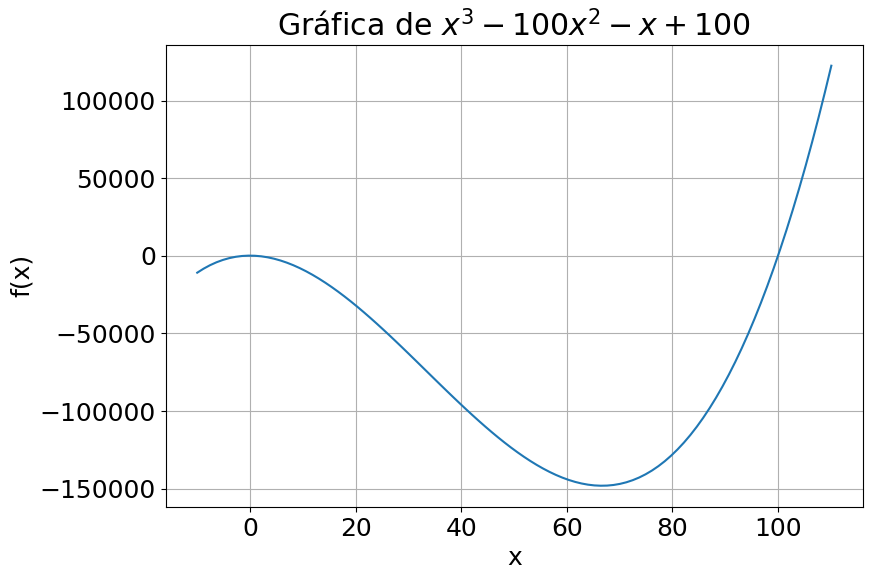

In [7]:
showplot()

### Métodos combinados
Los metodos más sofisticados para búsqueda de raices combinan métodos de intervalo abierto y cerrado. Por un lado, el método de intervalo abierto permite una convergencia más rápida, mientras que el método de intervalo cerrado permite acotar la solución. 

En términos generales, los métodos combinados operan de la siguente forma.
- Se subdivide el dominio de la función para identificar intervalos donde existan raices.
- Se procede con la iteración mediante un método de intervalo abierto
- Si la solución se mueve fuera del intervalo acotado, se procede a iterar con un método de intervalo cerrado.

Por ejemplo, el **método de Brent's** combina un método de intervalo abierto (como Newton-Raphson o secante), con el método de la bisección. Más información en las referencias

### Raices de función escalar en python 
En python, la función ```root_scalar``` de la librería ```scipy.optimize```, permite determinar raíces de una función escalar.

Los argumento más relevantes en esta función son:
```python
from scipy.optimize import root_scalar
root_scalar(f,            # callable, función objetivo
            args=(),      # tuple (opcional), argumentos extra para la función
            method=None,  # str (opcional), tipo de método
            bracket=None, # 2 floats list (opcional), intervalo de búsqueda de raíces
            fprime=None,  # callable (opcional), primera derivada
            x0=None,      # float (opcional), valor inicial
            x1=None,      # float (opcional), 2do valor inicial (para aproximar derivada)
            xtol=None,    # float (opcional), tolerancia para error absoluto
            rtol=None,    # float (opcional), tolerancia para error relativo
            maxiter=None  # int (opcional), número máximo de operaciones
           )
```

La función tiene implementada distintos métodos de intervalo abierto, cerrado y combinados, tales como: bisección (`bisect`), Newton-Raphson (`newton`), secante (`secant`) y Brent's (`brentq` o `brenth`). El tipo de método debe ir indicado en `method`:

Además de la función objetivo, se debe indicar un valor inicial, dos valores iniciales o un intervalo. Con esto `root_scalar` definirá el tipo de método dependiendo del input: 

- Un valor inicial $x_0$ (variable `x0`), y la derivada (variable `fprime`) $\rightarrow$ método de intervalo abierto o híbrido
- Dos valores iniciales $x_0$ (variable `x0`) y $x_1$ (variable `x1`) $\rightarrow$ método de intervalo abierto o híbrido
- Un intervalo. (variable `bracket`)  $\rightarrow$ método de intervalo cerrado o híbrido

El tipo de argumento para cada método está indicado en la siguiente tabla (x=requerido, o=opcional):

|`method`| `f` |`args`|`brackets`| `x0` | `x1` |`fprime`|`xtol`|`rtol`|`maxiter`|
|:----:|:-:|:--:|:------:|:--:|:--:|:----:|:--:|:--:|:-----:|
|`'bisect'`|x|o|x| | | |o|o|o|o|
|`'brentq'`|x|o|x| | | |o|o|o|o|
|`'brenth'`|x|o|x| | | |o|o|o|o|
|`'secant'`|x|o| |x|x| |o|o|o|o|
|`'newton'`|x|o| |x| |x|o|o|o|o|



Por ejemplo, analizamos la raíz de la función $f(x) = x^3 - 1$.

In [8]:
from scipy.optimize import root_scalar
f  = lambda x: x**3 - 1 # función objetivo f(x)
df = lambda x: 3*x**2   # primera derivada de f(x)

Usamor `roor_scalar` con el argumento `method` para especificar el tipo de método que queremos utilizar

In [9]:
print('Bisección:\n',      root_scalar(f,bracket=[0, 3]  ,method='bisect'))
print('\nNewton-Raphson:\n', root_scalar(f,x0=0.2,fprime=df,method='newton'))
print('\nSecante:\n',        root_scalar(f,x0=0.2,x1=0.21  ,method='secant'))

Bisección:
       converged: True
           flag: converged
 function_calls: 43
     iterations: 41
           root: 1.0000000000004547
         method: bisect

Newton-Raphson:
       converged: True
           flag: converged
 function_calls: 22
     iterations: 11
           root: 1.0
         method: newton

Secante:
       converged: True
           flag: converged
 function_calls: 23
     iterations: 22
           root: 1.0
         method: secant


Si omitimos el argumento `method`, `root_scalar` utilizará el método más adecuado en base al tipo de input (`x0`, `bracket`, `fprime`, ect) 

In [10]:
print('Brent´s:\n',                                      root_scalar(f,bracket=[0, 3],method='brentq'))
print('\nIntervalo (método por defecto):\n',               root_scalar(f,bracket=[0, 3]))
print('\nCond. inicial y derivada (método po defecto):\n', root_scalar(f,x0=0.2,fprime=df))

Brent´s:
       converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 1.0
         method: brentq

Intervalo (método por defecto):
       converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 1.0
         method: brentq

Cond. inicial y derivada (método po defecto):
       converged: True
           flag: converged
 function_calls: 22
     iterations: 11
           root: 1.0
         method: newton


Si hacemos ```sol = root_scalar```, la variable ```sol``` almacena la información desplegada anteriormente mediante `print`.

In [11]:
sol = root_scalar(f,bracket=[0, 3])
print('raíz x*=%.3f' % sol.root)

raíz x*=1.000


También podemos extraer el valor de la raíz directamente mediante ```root_scalar(...).root```

In [12]:
print('raíz x*=%.3f' % root_scalar(f,bracket=[0, 3]).root)

raíz x*=1.000


Para controlar la tolerancia en ```root_scalar``` podemos usar:
- ```xtol``` para el error absoluto, por ejemplo:
```python
sol = root_scalar(f,bracket=[0, 3],xtol=1E-5) # error absoluto de 0.00001 
```
- ```rtol``` para el error realtivo, por ejemplo:
```python
sol = root_scalar(f,bracket=[0, 3],rtol=0.001) # error relativo de 0.1%
```

También podemos usar combinaciones de ambas. En ese caso, la iteración finalizará cuando se cumpla cualquiera de los dos criterios. 

Por último, también podemos definir el numero máximo de iteraciones mediante ```maxiter```:
```python
sol = root_scalar(f,bracket=[0, 3],maxiter=1000) # máximo 1000 iteraciones
```

Para mayor información revisar la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html).

## Búsqueda de raíces para funciones vectoriales
Una función vectorial es una función con una o más variables dependientes, que entrega un vector de múltiples dimensiones.

\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}^m
\end{equation*}

Consideremos el siguiente sistema de ecuaciones:
\begin{align*}
x\log(y^2-1) &= 3 \\
y\sin(2x^3) + e^y &= 2
\end{align*}

Resolver este sistema, es equivalente a encontrar las raices de una función vetorial del tipo:
\begin{equation*}
\vec{F}(x,y) = \Bigg\{
\begin{matrix}
f(x,y) &= x\log(y^2-1) - 3 \\
g(x,y) &= y\sin(2x^3) + e^y - 2
\end{matrix}
\end{equation*}

Así, resolver un sistema de ecuaciones de $n$ incognitas, es equivalente a encontrar las raices de una función vectorial del tipo:

\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}^n
\end{equation*}

En este capítulo revisaremos los aspectos generales de los métodos numéricos para resolver este problema.

### Métodos de búsqueda lineal
Para un vector $\vec{x} = \{x_1, x_2, ... x_n\}$, y una función vectorial $\vec{F}\left(\vec{x}\right) = \big\{f_1\left(\vec{x}\right),f_2\left(\vec{x}\right), ... f_n\left(\vec{x}\right)\big\}$, consideremos la forma generalizada del método de Newton-Raphson:

\begin{equation*}
\vec{x}_k = \vec{x}_{k-1} - {\left[\bar{J}(\vec{x}_{k-1})\right]}^{-1}\cdot \vec{F}\left(\vec{x}_{k-1}\right) 
\end{equation*}

donde $\bar{J} = \nabla\vec{F}$ es el **Jacobiano** de $\vec{F}$. 

 El **operador $\nabla \vec{F}$ corresponde a una matriz**, donde cada elemento está dado por la derivada parcial de una componente de la función respecto a un parámetro independiente, es decir: $J_{ij} = \frac{\partial f_i}{\partial x_j}$

Por ejemplo, para una función vectorial $\vec{F}(x,y) = \big\{f(x,y), g(x,y)\big\}$, el Jacobiano está dado por:

\begin{equation*}
\bar{J}(x,y) = 
\left[
\begin{matrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{matrix}\right]
\end{equation*}

En otras palabras, el Jacobiano es equivalente a la derivada pero para funciones vectoriales.


El método generalizado de Newton-Raphson, así, consiste en encontrar un nuevo vector $\vec{x}_{k+1}$ a partir de la pendiente descendiente definida en el vector $\vec{x}_{k}$.

Sin embargo, a diferencia del caso unidimensional, el Jacobiano entrega multiples direcciones posibles. ¿Como saber cuál es la dirección que minimiza $\vec{F}$?

Para definir la dirección descendiente se considera el criterio:

\begin{equation*}
\mathrm{min}\left[\vec{F}\cdot\vec{F}\right] 
\end{equation*}

Así, el problema de busqueda de raíces de una función vectorial se transforma en un problema de minimización.

Esta es la estrategia de los **métodos de búsqueda lineal**.

Entre los más conocidos tenemos el **método de Broyden**. Más información en las referencias

### Métodos de región de confianza

En general, determinar el Jacobiano de una función vectorial es complicado. A raíz de esto nacen los métodos de región de confianza, los cuales se basan en una aproximación de $\vec{F}$ en forma de paraboloide. Esta aproximación simplifica el cálculo del Jacobiano. 

Se define como **región de confianza a la región donde la función puede ser aproximada por un parabolide**.

En términos generales, los métodos de región de confianza operan de la siguiente forma:

- Se define una región de confianza inicial y se busca un mínimo dentro esa región.
- Si el valor encontrado minimiza $\vec{F}\cdot\vec{F}$, se construye una aproximación hyperboloide de $\vec{F}$ y se incrementa la región de confianza.
- Si el valor encontrado no minisa $\vec{F}\cdot\vec{F}$, se reduce la región de confianza, y se vuelve a buscar el mínimo.
- El algoritmo itera hasta encontrar un mínimo global de $\vec{F}$.

En general, los métodos de región de confianza son más estables que los métodos de búsqueda lineal, y son los métodos por defecto en funciones de python.

Mayor información sobre estos métodos [acá](http://www.applied-mathematics.net/optimization/optimizationIntro.html)

### Raíces de función vectorial en python
En python, la función ```fsolve``` de la librería ```scipy.optimize``` permite encontrar las raíces de una función vectorial.

Los principales inputs de la función son:

```python
scipy.optimize.fsolve(func,             # función vectorial objetivo (callable)
                      x0,               # valores iniciales
                      args=(),          # argumentos extras para la iteración
                      xtol=1.49012e-08  # tolerancia al error relativo
                     )
```

La función se basa en los algoritmos de región de confianza "hybrd" y "hybrj" de la libreria ```MINPACK```. Más detalles [acá](https://www.math.utah.edu/software/minpack/minpack/hybrj.html)

La función ```fsolve``` requiere, como mínimo, la función vectorial y los valores iniciales.

Por ejemplo, queremos resolver el sistema

\begin{align*}
x\cos(y)=4 \\
xy-y=5
\end{align*}

In [13]:
import numpy as np
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]

root = fsolve(func, x0 = [1, 1])
print('la solución es: ', root)

la solución es:  [6.50409711 0.90841421]


In [16]:
func(root)

[3.732125719579926e-12, 1.617106448748018e-11]

También podemos definir el error absoluto mediante la instrucción ```xtol``` (por defecto, ```xtol=1.49012e-08```).
```python
root = fsolve(func, [1, 1], xtol = 1E-10) # |xk+1 - xk| < 1E-10
```

Para mayor información, revisar la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 19: Root Finding** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Parte dos: Raíces de ecuaciones** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011

- Williams H. P. **Chapter 9: Root Finding and Nonlinear Sets of Equations** in "Numerical Recipes" 3rd Ed, Cambridge University Press, 2007